In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
data.rename(columns= {'R&D Spend': 'rd','Marketing Spend': 'Market'}, inplace=True)

In [8]:
data.head(2)

,rd,Administration,Market,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [9]:
import statsmodels.formula.api as smf

In [10]:
model = smf.ols("Profit~ Market + Administration + rd", data= data).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           4.53e-30
Time:                        08:36:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Market             0.0272      0.016      1.655      0.105      -0.006       0.060
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
rd                 0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
import seaborn as sns

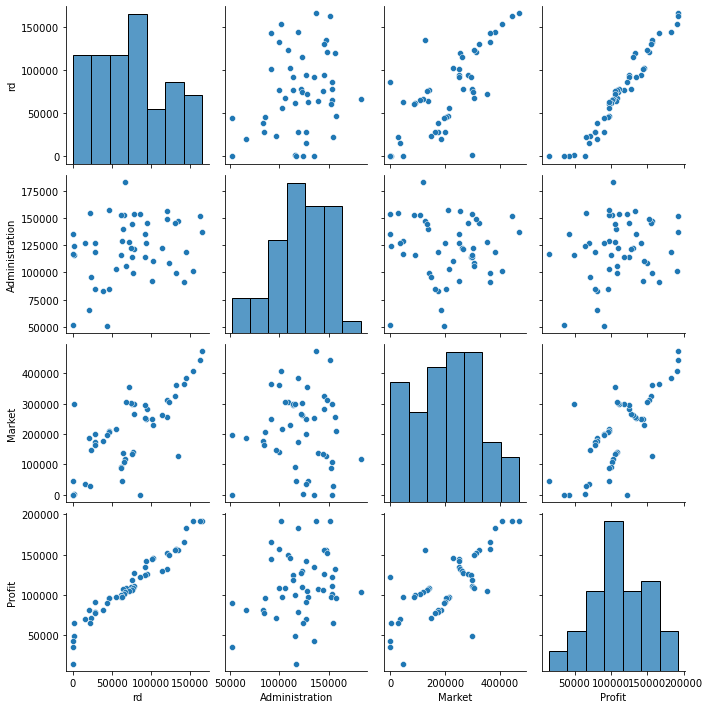

In [13]:
sns.pairplot(data)

In [14]:
model.params

Intercept         50122.192990
Market                0.027228
Administration       -0.026816
rd                    0.805715
dtype: float64

In [15]:
print(f' tvalues is:  {model.tvalues},\n\n  pvalues is: {model.pvalues}')

 tvalues is:  Intercept          7.626218
Market             1.655077
Administration    -0.525507
rd                17.846374
dtype: float64,

  pvalues is: Intercept         1.057379e-09
Market            1.047168e-01
Administration    6.017551e-01
rd                2.634968e-22
dtype: float64


In [16]:
model.rsquared

0.9507459940683246

In [17]:
model.rsquared_adj

0.9475337762901719

In [18]:
df = pd.DataFrame({'rd':165349.2, 'Administration':136897.80, 'Market':471784.10}, index=[1])

In [19]:
df

,rd,Administration,Market
1,165349.2,136897.8,471784.1


In [20]:
model.predict(df)

1    192521.25289
dtype: float64

In [21]:
data.head()

,rd,Administration,Market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [22]:
## improve the model
from statsmodels.graphics.regressionplots import influence_plot

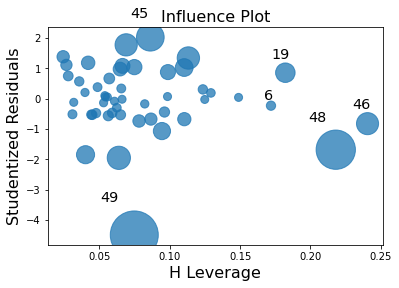

In [23]:
influence_plot(model)
plt.show()

In [24]:
data.head(2)

,rd,Administration,Market,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [25]:
new_data = data.drop(data.index[[45,49]],axis=0).reset_index()

In [26]:
new_data.drop(['index'],axis=1, inplace=True)

In [27]:
new_data.head()

,rd,Administration,Market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
model2 = smf.ols("Profit~ Market + Administration + rd", data= new_data).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           4.53e-30
Time:                        08:36:46   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Market             0.0272      0.016      1.655      0.105      -0.006       0.060
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
rd                 0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
model2.rsquared

0.9633261096032565

In [31]:
final_ml_V = model2.get_influence()
(c_V, _) = final_ml_V.cooks_distance

<function matplotlib.pyplot.show(close=None, block=None)>

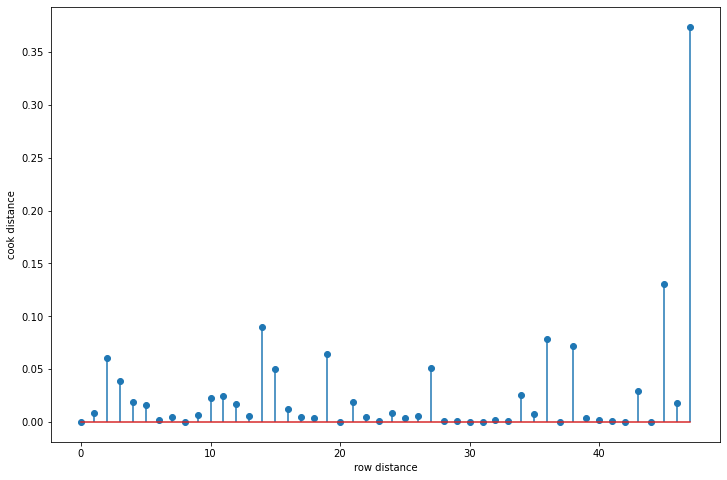

In [32]:
plt.figure(figsize=(12,8))
plt.stem(np.arange(len(new_data)), np.round(c_V,3))
plt.xlabel('row distance')
plt.ylabel('cook distance')
plt.show

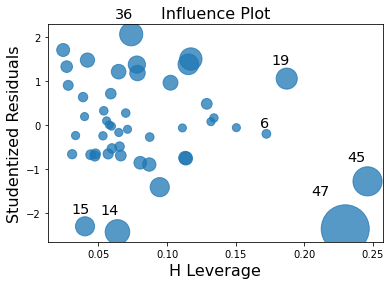

In [33]:
influence_plot(model2)
plt.show()

In [34]:
np.argmax(c_V), np.max(c_V)

(47, 0.3743077463025058)

In [35]:
new_data2 = new_data.drop(new_data.index[[47]],axis=0)

In [36]:
new_data2.head()

,rd,Administration,Market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [37]:
model3 = smf.ols("Profit~ Market + Administration + rd", data= new_data2).fit()

In [38]:
model3.rsquared

0.9640877256125092

In [39]:
arr = new_data2.drop(['State','Profit'],axis=1)

In [40]:
model3.predict(arr[0:5])

0    189966.573276
1    186297.911272
2    181485.610512
3    172661.465059
4    172251.753910
dtype: float64

## Direct method for multi linear Regression without using Transformation

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
data.head()

,rd,Administration,Market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [43]:
train = new_data2.iloc[:, :3]

In [44]:
test = new_data2.iloc[:, -1]

In [45]:
model4 = LinearRegression()

In [46]:
model4.fit(train, test)

LinearRegression()

In [47]:
model4.predict(train[:4])

array([189966.57327568, 186297.91127159, 181485.61051156, 172661.46505878])

## Standardization of the model

In [48]:
data.isnull().sum()

rd                0
Administration    0
Market            0
State             0
Profit            0
dtype: int64

In [49]:
data.isna().sum()

rd                0
Administration    0
Market            0
State             0
Profit            0
dtype: int64

In [50]:
data.head()

,rd,Administration,Market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [51]:
data.drop('State',axis=1, inplace=True)

In [52]:
data.head()

,rd,Administration,Market,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x = data.iloc[:,:3]
y = data.iloc[:,-1]

In [55]:
## apply train test split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=30)

In [56]:
X_test[:5]

,rd,Administration,Market
41,27892.92,84710.77,164470.71
20,76253.86,113867.30,298664.47
32,63408.86,129219.61,46085.25
43,15505.73,127382.30,35534.17
10,101913.08,110594.11,229160.95


In [57]:
##Standardization
from sklearn.preprocessing import StandardScaler

In [58]:
sds = StandardScaler()

In [59]:
X_train_scaled = sds.fit_transform(X_train)

In [60]:
X_train_scaled[:5]

array([[ 1.07472634, -0.62912686,  1.0821924 ],
       [-1.12060395, -1.77082338, -0.31681979],
       [-0.00345731, -0.64710751, -0.66886696],
       [-0.21960355,  2.16321695, -0.84553228],
       [ 0.85185749,  1.01950347,  0.67848641]])

In [61]:
X_test_scaled = sds.fit_transform(X_test)

In [62]:
X_test_scaled[:5]

array([[-1.37282044, -2.04877045, -0.13065024],
       [ 0.38979234, -0.67001646,  1.23713241],
       [-0.0783698 ,  0.05596358, -1.33730529],
       [-1.82429676, -0.03091913, -1.44484817],
       [ 1.32499479, -0.82479907,  0.52871118]])

In [63]:
## Apply mechien learning Algorithm
from sklearn.linear_model import LinearRegression

In [64]:
reg_model = LinearRegression()

In [65]:
reg_model.fit(X_train_scaled,y_train)

LinearRegression()

In [67]:
pred_y = reg_model.predict(X_test_scaled)

In [68]:
actual_pred = pd.DataFrame({'Actual': y_test, 'Predict': np.round(pred_y,2)})

In [69]:
actual_pred

,Actual,Predict
41,77798.83,60313.42
20,118474.03,137036.99
32,97427.84,104891.32
43,69758.98,33698.35
10,146121.95,171655.63
29,101004.64,110060.56
33,96778.92,102719.17
25,107404.34,110809.59
34,96712.80,86635.82
19,122776.86,135492.89


In [70]:
corr_metrix = np.corrcoef(y_test,pred_y)

In [71]:
corr = corr_metrix[0,1]
r_sq = corr**2

In [72]:
r_sq

0.9479470780195118

In [76]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [77]:
print("Mean absolute error: ", metrics.mean_absolute_error(y_test, pred_y))
print("Mean squared error: ", metrics.mean_squared_error(y_test, pred_y))
print("Root mean square error: ", np.sqrt(metrics.mean_absolute_error(y_test, pred_y)))
print("R^2: ", metrics.r2_score(y_test, pred_y))


Mean absolute error:  19477.31446103131
Mean squared error:  556455375.8394412
Root mean square error:  139.56114954037642
R^2:  -0.16575340176153075


## min max scaling

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
x = data.iloc[:,:3]
y = data.iloc[:,-1]
## apply train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(x,y,test_size=0.3, random_state=30)

In [81]:
min_max = MinMaxScaler()

In [82]:
X_train_min_max = pd.DataFrame(min_max.fit_transform(X_train2), columns= X_train2.columns)

In [83]:
X_test_min_max = pd.DataFrame(min_max.fit_transform(X_test2), columns= X_test2.columns)

In [84]:
X_train_min_max[:5]

,rd,Administration,Market
0,0.797566,0.369448,0.769126
1,0.122345,0.111636,0.392690
2,0.465947,0.365388,0.297964
3,0.399467,1.000000,0.250429
4,0.729018,0.741733,0.660500


In [85]:
X_test_min_max[:5]

,rd,Administration,Market
0,0.114878,0.000000,0.539281
1,0.563374,0.399497,0.979287
2,0.444250,0.609851,0.151108
3,0.000000,0.584676,0.116512
4,0.801336,0.354648,0.751393


In [86]:
## now fit he regression model

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
liner_model2 = LinearRegression()

In [89]:
liner_model2.fit(X_train_min_max, y_train2)

LinearRegression()

In [90]:
min_max_pred = liner_model2.predict(X_test_min_max)

In [91]:
min_max_actual_pred = pd.DataFrame({'actual': y_test2, 'predict': min_max_pred})

In [92]:
min_max_actual_pred[:10]

,actual,predict
41,77798.83,71497.592135
20,118474.03,136801.679240
32,97427.84,105295.279839
43,69758.98,46244.862157
10,146121.95,164245.701860
29,101004.64,110185.119956
33,96778.92,107108.657287
25,107404.34,111646.397615
34,96712.80,92593.715497
19,122776.86,129266.811887


In [93]:
corr_metrix = np.corrcoef(y_test2,min_max_pred)
corr = corr_metrix[0,1]
r_sq = corr**2
print(r_sq)

0.9403127287640215


In [94]:
print("Mean absolute error: ", metrics.mean_absolute_error(y_test2, min_max_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test2, min_max_pred))
print("Root mean square error: ", np.sqrt(metrics.mean_absolute_error(y_test2, min_max_pred)))
print("R^2: ", metrics.r2_score(y_test2, min_max_pred))


Mean absolute error:  15242.20315324496
Mean squared error:  349490844.0606212
Root mean square error:  123.4593178064943
R^2:  0.26782962652923625


## RobustScaler

In [95]:
from sklearn.preprocessing import RobustScaler

In [96]:
rs = RobustScaler()

In [97]:
x = data.iloc[:,:3]
y = data.iloc[:,-1]
## apply train test split
X_train3, X_test3, y_train3, y_test3 = train_test_split(x,y,test_size=0.3, random_state=25)

In [98]:
df_robust_sc = pd.DataFrame(rs.fit_transform(X_train3))
df_robust_sc.head()

,0,1,2
0,1.250974,0.677646,-0.411895
1,-0.275331,0.178649,-0.844071
2,0.217904,0.852920,-1.088057
3,-0.228247,0.839541,-0.520842
4,0.550003,-0.338284,0.125173


In [99]:
df_robust_sc = pd.DataFrame(rs.fit_transform(X_test3))
df_robust_sc.head()

,0,1,2
0,-0.255992,0.212738,-0.116502
1,-0.650138,-0.068241,0.711357
2,1.208771,0.674550,0.942172
3,-0.267101,-0.845819,-0.432647
4,0.695110,0.663239,0.585954


In [100]:

## apply the regression model
from sklearn.linear_model import LinearRegression

In [101]:
robust_model = LinearRegression()

In [102]:
robust_model.fit(X_train3,y_train3)

LinearRegression()

In [103]:
rs_prid = robust_model.predict(X_test3)

In [104]:
rs_prid[:5]

array([ 74175.40234749,  54573.00484893, 160569.80847149,  74045.0380698 ,
       130109.06506909])

In [105]:
robust_actual_pridict = pd.DataFrame({"actual": y_test3, 'pridict': rs_prid})

In [106]:
robust_actual_pridict[:10]

,actual,pridict
36,90708.19,74175.402347
46,49490.75,54573.004849
7,155752.60,160569.808471
41,77798.83,74045.038070
17,125370.37,130109.065069
14,132602.65,149860.448275
34,96712.80,88004.410661
33,96778.92,97488.815367
45,64926.08,46182.514696
39,81005.76,83176.897017


In [107]:
corr_metrix = np.corrcoef(y_test3,rs_prid)
corr = corr_metrix[0,1]
r_sq = corr**2
print(r_sq)

0.942801378672997


In [108]:
r2_score(y_test3,rs_prid)

0.9395887786717829

In [109]:
print("Mean absolute error: ", metrics.mean_absolute_error(y_test3, rs_prid))
print("Mean squared error: ", metrics.mean_squared_error(y_test3, rs_prid))
print("Root mean square error: ", np.sqrt(metrics.mean_absolute_error(y_test3, rs_prid)))
print("R^2: ", metrics.r2_score(y_test3, rs_prid))


Mean absolute error:  8292.1894629895
Mean squared error:  98269412.87576883
Root mean square error:  91.06145981143449
R^2:  0.9395887786717829
